## Part- 1 - Intro to tensors

In [1]:
import torch

In [2]:
#sigmoid activation
def activation(x):
    return 1/(1+torch.exp(-x))



In [3]:
torch.manual_seed(7) #generates data

#generates 5 random vars, size is 1 row and 5 columns
features = torch.randn((1,5))

#generate weights with same shape as features
weights = torch.randn_like(features)

#define a bias term
bias = torch.randn((1,1))

In [4]:
#First, calculate output using weights and bias tensors

y = activation((features*weights).sum() + bias)
print(y)

tensor([[0.1595]])


In [5]:
# Second, calculate output of network using matrix multiplication

y = activation(torch.mm(features, weights.view(5,1)) + bias)
print(y)

tensor([[0.1595]])


### Adding more layers

In [6]:
#generate more data
torch.manual_seed(7)

#features are 3 random normal variables
features = torch.randn((1,3))

#define the size of each layer in the network
n_input = features.shape[1] #must match number of input features
n_hidden = 2
n_output = 1

#weights for input to hidden layer
w1 = torch.randn(n_input,n_hidden)

#weights for hidden to output layer
w2 = torch.randn(n_hidden, n_output)

#bias terms for both layers
b1 = torch.randn((1, n_hidden))
b2 = torch.randn((1, n_output))

In [7]:
h = activation(torch.mm(features, w1) + b1)
output = activation(torch.mm(h, w2) + b2)
print(output)

tensor([[0.3171]])


## Part- 2 Neural Networks with PyTorch

In [8]:
#import more packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt


### Importing and Transforming Data

In [9]:
from torchvision import datasets, transforms

#data normalization using transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)),
                               ])

#download and load training data aka MNIST dataset here. 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', 
                         download = True,
                         train = True, 
                         transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=64, #64 images in each iteration
                                         shuffle =True)

In [10]:
dataiter = iter(trainloader) #iterate thru dataset 
images, labels = dataiter.next() #get the image and associated label in each iteration

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


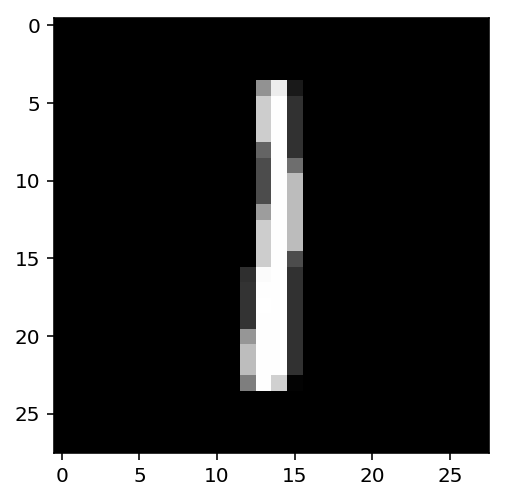

In [11]:
#plot an example
plt.imshow(images[3].numpy().squeeze(), cmap='Greys_r')

**Exercise**: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [12]:
#use activation func defined above

inputs = images.view(images.shape[0], -1)
#batch size remains the same while -1 flattens the image

W1 = torch.randn(784,256)
B1 = torch.randn(256)

W2=torch.randn(256,10)
B2=torch.randn(10)

h = activation(torch.mm(inputs,W1)+B1)
output = activation(torch.mm(h,W2)+B2)

print(output.shape)

torch.Size([64, 10])


### Using Softmax activation </br>
To calculate probability distribution

**Exercise**: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [13]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),
                                 dim=1).view(-1,1)
probabilities = softmax(output)

print(probabilities.shape) #check shape

print(probabilities.sum(dim=1)) #check sum, shud = 1


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Build a Network

In [14]:
from torch import nn

In [15]:
class Network(nn.Module):
    def __init__ (self):
        super().__init__()
        
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x

### Text representation of Network

In [16]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

### Alternative: </br>
using nn.functional

In [17]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        
        self.hidden = nn.Linear(784,256)
        self.output=nn.Linear(256,10)
        
    def forward(self, x):
        
        x=F.sigmoid(self.hidden(x))
        x=F.softmax(self.output(x), dim=1)
        
        return x

In [18]:
print(model.hidden.weight)

Parameter containing:
tensor([[ 0.0219, -0.0308,  0.0297,  ..., -0.0044, -0.0092,  0.0109],
        [ 0.0017,  0.0100,  0.0100,  ...,  0.0201, -0.0118,  0.0172],
        [ 0.0275,  0.0161, -0.0163,  ..., -0.0271,  0.0029, -0.0123],
        ...,
        [-0.0085,  0.0134, -0.0203,  ..., -0.0170,  0.0070,  0.0125],
        [-0.0043,  0.0144, -0.0192,  ...,  0.0091, -0.0009,  0.0074],
        [-0.0163,  0.0308, -0.0002,  ...,  0.0033,  0.0122, -0.0110]],
       requires_grad=True)


In [19]:
print(model.hidden.bias)

Parameter containing:
tensor([ 0.0131,  0.0059,  0.0049, -0.0089,  0.0288,  0.0030, -0.0065,  0.0276,
         0.0240, -0.0237,  0.0135, -0.0111,  0.0287,  0.0128, -0.0167,  0.0032,
        -0.0320, -0.0230,  0.0326, -0.0179, -0.0116, -0.0056,  0.0347,  0.0290,
         0.0309,  0.0123, -0.0154,  0.0352,  0.0015, -0.0257,  0.0071,  0.0195,
        -0.0009,  0.0192,  0.0252,  0.0135,  0.0021, -0.0183,  0.0069,  0.0337,
         0.0180,  0.0347, -0.0273, -0.0329,  0.0274,  0.0201, -0.0274,  0.0297,
        -0.0161,  0.0213,  0.0122,  0.0216, -0.0073,  0.0262, -0.0189, -0.0070,
        -0.0075, -0.0077, -0.0077, -0.0127, -0.0180,  0.0230,  0.0012, -0.0331,
         0.0133,  0.0003, -0.0274, -0.0112, -0.0322,  0.0201, -0.0077,  0.0268,
         0.0124, -0.0291,  0.0049, -0.0351, -0.0130, -0.0136,  0.0105, -0.0022,
        -0.0205,  0.0277, -0.0005, -0.0351, -0.0169,  0.0303, -0.0143, -0.0218,
         0.0189, -0.0134,  0.0180, -0.0334,  0.0219, -0.0110,  0.0019, -0.0247,
         0.0008,  

In [20]:
model.hidden.bias.data.fill_(0) #set all biases to 0

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [21]:
model.hidden.weight.data.normal_(std=0.01) #random normal variables 

tensor([[ 0.0099, -0.0076,  0.0079,  ...,  0.0054, -0.0297, -0.0064],
        [-0.0053, -0.0163,  0.0172,  ..., -0.0093,  0.0088, -0.0070],
        [ 0.0041, -0.0199,  0.0070,  ...,  0.0045,  0.0130, -0.0079],
        ...,
        [-0.0075, -0.0147, -0.0072,  ..., -0.0185,  0.0025,  0.0168],
        [ 0.0139,  0.0023,  0.0206,  ..., -0.0086,  0.0194,  0.0126],
        [ 0.0025,  0.0082, -0.0072,  ...,  0.0247,  0.0121, -0.0060]])

### Pass image to the network

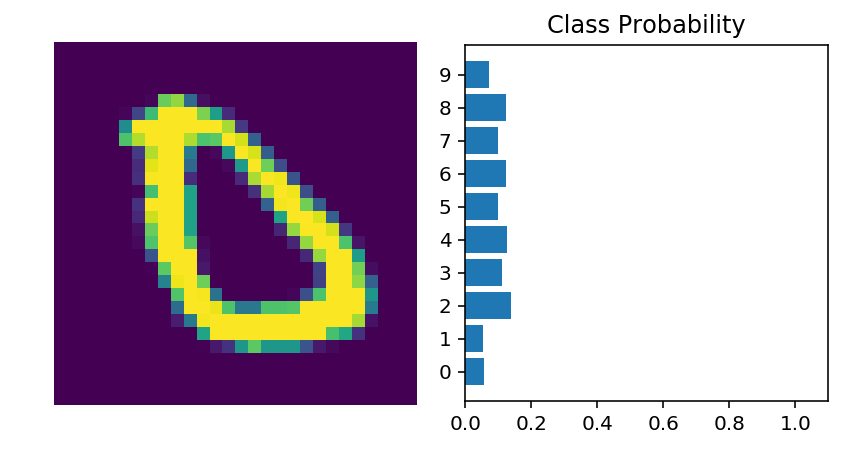

In [23]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

images.resize_(64,1,784)

img_idx = 0
ps=model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1,28,28),ps)

### Using `nn.Sequential` </br>

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


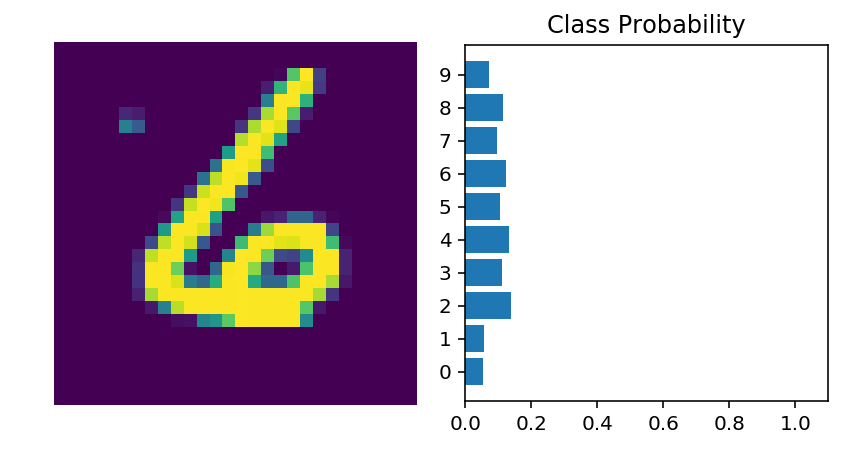

In [24]:
#adding more layers to the network
input_size = 784
hidden_sizes= [128,64]
output_size = 10

#can also use OrderedDict to name the individual layers
my_model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1],output_size),
                        nn.Softmax(dim=1))

print(my_model)

#Forward pass
images,labels = next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28),ps)

In [25]:
print(my_model[0])
my_model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0180, -0.0311, -0.0070,  ..., -0.0099,  0.0005, -0.0152],
        [ 0.0020, -0.0265, -0.0281,  ...,  0.0302, -0.0071, -0.0049],
        [-0.0355,  0.0343, -0.0177,  ..., -0.0295,  0.0339, -0.0071],
        ...,
        [ 0.0332, -0.0239,  0.0034,  ..., -0.0015, -0.0070, -0.0010],
        [-0.0059, -0.0352, -0.0142,  ...,  0.0112, -0.0285, -0.0254],
        [-0.0332, -0.0039, -0.0028,  ..., -0.0247, -0.0050,  0.0192]],
       requires_grad=True)